In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
df=pd.read_csv("train.csv")
df.head(5)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.shape

(6019, 13)

In [4]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [5]:
df['Seats'].mode()

0    5.0
Name: Seats, dtype: float64

In [6]:
df['Seats'].fillna(value=5.0,inplace =True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              6019 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [8]:
#removing kmpl and km/kg from mileage column
df['Mileage'] = df['Mileage'].apply(lambda x: str(x).replace('kmpl', '') if 'kmpl' in str(x) else str(x))
df['Mileage'] = df['Mileage'].apply(lambda x:str(x).replace('km/kg', '') if 'km/kg' in str(x) else str(x))
#removing CC from engine column
df['Engine'] = df['Engine'].apply(lambda x: str(x).replace('CC', '') if 'CC' in str(x) else str(x))
#removing bhp from power column
df['Power'] = df['Power'].apply(lambda x: str(x).replace('bhp', '') if 'bhp' in str(x) else str(x))


In [9]:
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')

In [10]:
df['Mileage'].mode()

0    17.0
Name: Mileage, dtype: float64

In [11]:
df['Mileage'].fillna(value=17.0,inplace=True)

In [12]:
df['Engine'].mode()

0    1197.0
Name: Engine, dtype: float64

In [13]:
df['Engine'].fillna(value=17.0,inplace=True)

In [14]:
df['Power'].mode()

0    74.0
Name: Power, dtype: float64

In [15]:
df['Power'].fillna(value=17.0,inplace=True)

In [16]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
dtype: int64

In [17]:
df['Name'].nunique()

1876

In [18]:
df['Brand_Name'] = df['Name'].str.split(' ').str[0]
df.groupby('Brand_Name').nunique()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
Brand_Name,,,,,,,,,,,,,
Ambassador,1,1,1,1,1,1,1,1,1,1,1,0,1
Audi,69,11,12,180,2,1,3,38,11,29,5,19,166
BMW,87,11,14,190,2,1,3,46,9,26,4,30,182
Bentley,1,1,1,1,1,1,1,1,1,1,1,0,1
Chevrolet,43,11,15,107,2,2,3,25,11,26,6,0,80
Datsun,9,7,3,12,1,1,1,5,2,4,2,6,12
Fiat,20,9,11,26,2,1,3,12,5,13,1,1,23
Force,2,2,1,2,1,1,1,1,2,2,1,0,2
Ford,114,11,17,237,2,2,4,40,16,33,3,21,178


In [19]:
df['Brand_Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [20]:
df.Brand_Name[df.Brand_Name=='Isuzu']='ISUZU'

C:\Users\Admin\AppData\Local\Temp\ipykernel_4092\2024225589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Brand_Name[df.Brand_Name=='Isuzu']='ISUZU'


In [21]:
#dropping the Name ,Location and new_price column
df1_map=df.drop(["Name","Location","New_Price"],axis='columns')

In [22]:
df1_map.head(5)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


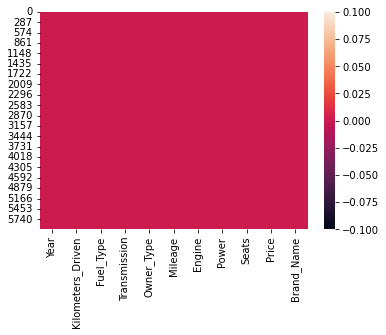

In [23]:
sns.heatmap(df1_map.isnull())
plt.show()

<Figure size 1440x576 with 0 Axes>

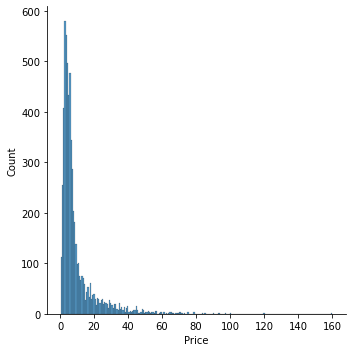

In [24]:
plt.figure(figsize=(20,8))
sns.displot(df1_map['Price'])

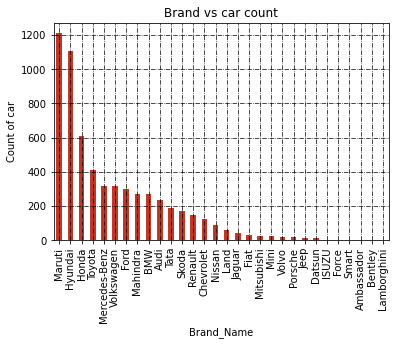

In [25]:
plt.xlabel('Brand_Name')
plt.ylabel('Count of car')
df1_map['Brand_Name'].value_counts().plot(kind='bar',title='Brand vs car count',color='#c03928')
plt.grid(color='black',linestyle='-.',linewidth=0.7)

<AxesSubplot:title={'center':'Year vs car count'}, xlabel='Year', ylabel='Count of car'>

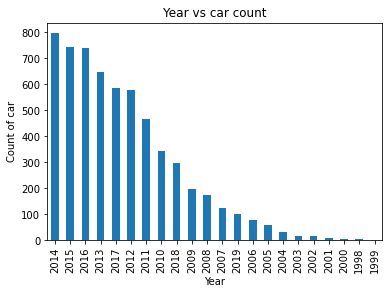

In [26]:
plt.xlabel('Year')
plt.ylabel('Count of car')
df1_map['Year'].value_counts().plot(kind='bar',title='Year vs car count')

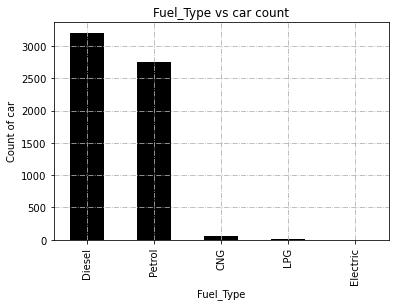

In [27]:
#fuel-type
plt.xlabel("Fuel_Type")
plt.ylabel("Count of car")
df1_map['Fuel_Type'].value_counts().plot(kind='bar',title='Fuel_Type vs car count',color='black')
plt.grid(linestyle='-.')


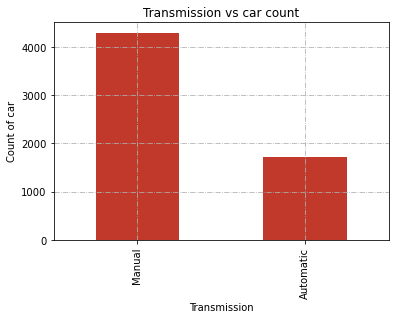

In [28]:
#Transmission
plt.xlabel("Transmission")
plt.ylabel("Count of car")
df1_map['Transmission'].value_counts().plot(kind='bar',title='Transmission vs car count',color='#C0392B')
plt.grid(linestyle='-.')


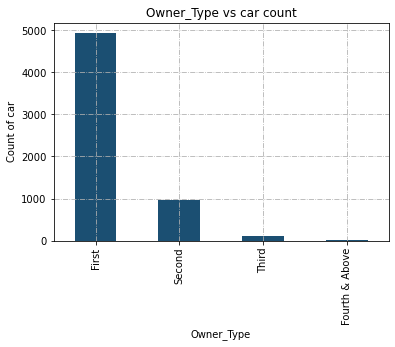

In [29]:
#owner type
plt.xlabel("Owner_Type")
plt.ylabel("Count of car")
df1_map['Owner_Type'].value_counts().plot(kind='bar',title='Owner_Type vs car count',color='#1B4F72')
plt.grid(linestyle='-.')


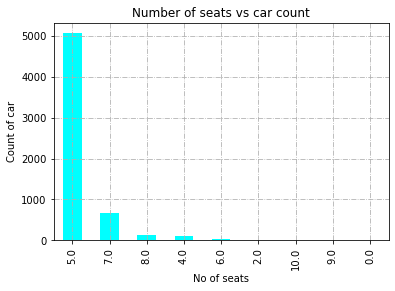

In [30]:
#seats
plt.xlabel("No of seats")
plt.ylabel("Count of car")
df1_map['Seats'].value_counts().plot(kind='bar',title='Number of seats vs car count',color='cyan')
plt.grid(linestyle='-.')

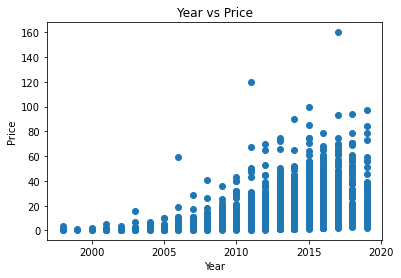

In [31]:
#year vs price
plt.title("Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.scatter(df1_map.Year,df1_map.Price)


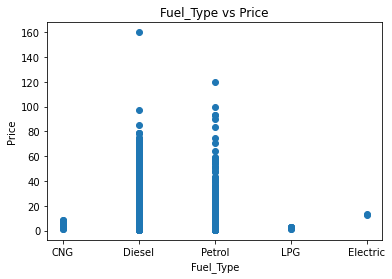

In [32]:
#fuel type vs price
plt.title("Fuel_Type vs Price")
plt.xlabel("Fuel_Type")
plt.ylabel("Price")
plt.scatter(df1_map.Fuel_Type,df1_map.Price)


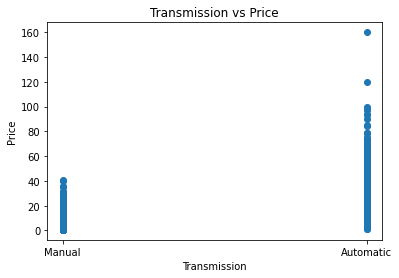

In [33]:
#transmission vs price
plt.title("Transmission vs Price")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.scatter(df1_map.Transmission,df1_map.Price)


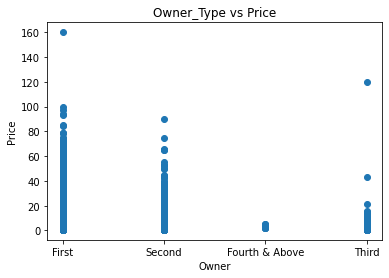

In [34]:
#owner type vs price
plt.title("Owner_Type vs Price")
plt.xlabel("Owner")
plt.ylabel("Price")
plt.scatter(df1_map.Owner_Type,df1_map.Price)

In [35]:
#removing outlier
df1_map.drop(df1_map[df1_map['Kilometers_Driven'] >= 6500000].index, axis=0, inplace=True)

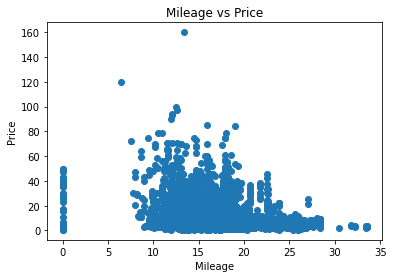

In [36]:
#mileage vs price
plt.title("Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.scatter(df1_map.Mileage,df1_map.Price)

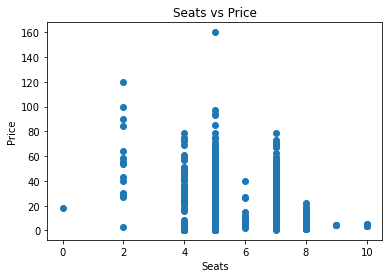

In [37]:
#Seats vs price
plt.title("Seats vs Price")
plt.xlabel("Seats")
plt.ylabel("Price")
plt.scatter(df1_map.Seats,df1_map.Price)

In [38]:
df1_map.isin([0]).sum()

Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              68
Engine                0
Power                 0
Seats                 1
Price                 0
Brand_Name            0
dtype: int64

In [39]:
df1_map.drop(df1_map[df1_map['Seats']==0].index,axis=0,inplace=True)

In [40]:
df1_map["Mileage"].replace({0.0:17.0 },inplace=True)

In [41]:
df1_map.isin([0]).sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand_Name           0
dtype: int64

In [42]:
df2_n = df1_map.copy()

In [43]:
from sklearn.preprocessing import LabelEncoder
le_Fuel_Type=LabelEncoder()
le_Transmission=LabelEncoder()
le_Owner_Type=LabelEncoder()
le_Brand_Name=LabelEncoder()
df2_n['Fuel_Type_n']= le_Fuel_Type.fit_transform(df2_n['Fuel_Type'])
df2_n['Transmission_n']=le_Transmission.fit_transform(df2_n['Transmission'])
df2_n['Owner_Type_n']=le_Owner_Type.fit_transform(df2_n['Owner_Type'])
df2_n['Brand_Name_n']=le_Brand_Name.fit_transform(df2_n['Brand_Name'])

In [44]:
df2_n.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand_Name,Fuel_Type_n,Transmission_n,Owner_Type_n,Brand_Name_n
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,0,1,0,17
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,1,1,0,10
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,4,1,0,9
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,1,1,0,17
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,1,0,2,1


In [45]:
df2_n=df2_n.drop(["Fuel_Type","Transmission","Owner_Type","Brand_Name"],axis='columns')

In [46]:
df2_n.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_n,Transmission_n,Owner_Type_n,Brand_Name_n
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,1,0,17
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,1,1,0,10
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,4,1,0,9
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,1,1,0,17
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,2,1


In [47]:
df2_n=df2_n[['Brand_Name_n','Year','Kilometers_Driven','Fuel_Type_n','Transmission_n','Owner_Type_n','Mileage','Engine','Power','Seats','Price']]

In [48]:
df2_n.head()

,Brand_Name_n,Year,Kilometers_Driven,Fuel_Type_n,Transmission_n,Owner_Type_n,Mileage,Engine,Power,Seats,Price
0,17,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,9,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,17,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,1,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


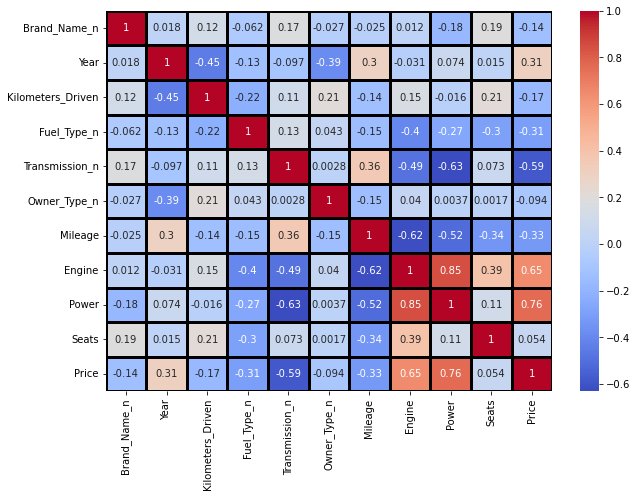

In [49]:
corrMatrix = df2_n.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True,cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

In [50]:
df3_inputs=df2_n.drop(['Price'],axis='columns')
df3_target=df2_n['Price']

In [51]:
df3_inputs.head()

,Brand_Name_n,Year,Kilometers_Driven,Fuel_Type_n,Transmission_n,Owner_Type_n,Mileage,Engine,Power,Seats
0,17,2010,72000,0,1,0,26.60,998.0,58.16,5.0
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0
2,9,2011,46000,4,1,0,18.20,1199.0,88.70,5.0
3,17,2012,87000,1,1,0,20.77,1248.0,88.76,7.0
4,1,2013,40670,1,0,2,15.20,1968.0,140.80,5.0


In [52]:
df3_target.head()

0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
Name: Price, dtype: float64

Train Test Split

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df3_inputs,df3_target,test_size=0.3,random_state=123)

Model Selection

In [54]:
X_train

,Brand_Name_n,Year,Kilometers_Driven,Fuel_Type_n,Transmission_n,Owner_Type_n,Mileage,Engine,Power,Seats
425,10,2017,23163,4,1,0,15.29,1591.0,121.3,5.0
2557,10,2013,84600,4,1,2,21.10,814.0,55.2,5.0
187,17,2017,24773,4,1,0,21.40,1197.0,83.1,5.0
5115,17,2010,90246,4,1,0,16.10,1298.0,88.2,5.0
3933,29,2015,100000,1,0,0,13.50,2400.0,215.0,5.0
...,...,...,...,...,...,...,...,...,...,...
5220,10,2015,14925,4,1,0,18.50,1197.0,82.9,5.0
4062,17,2015,30000,4,1,0,20.73,1373.0,91.1,5.0
1346,9,2012,66245,4,1,0,17.00,1497.0,118.0,5.0
3455,17,2014,41000,0,1,0,26.20,998.0,58.2,5.0


In [55]:
from sklearn.linear_model import ElasticNet,Lasso,Ridge, SGDRegressor, LinearRegression
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

model = [ElasticNet(),Lasso(),Ridge(), SGDRegressor(), SVR(), RandomForestRegressor(), AdaBoostRegressor()]
for i in model[0:4]:
    gride = GridSearchCV(estimator=i, cv=10, param_grid={'alpha': [0.00001,0.0001,0.001,0.01,0.1,1,1.10, 10,100]}, scoring='r2')
    gride.fit(X_train, y_train)
    pred = gride.predict(X_test)

In [56]:
from sklearn.model_selection import cross_val_score
def get_valdiation(model):
    cv=cross_val_score(model,X_train,y_train,cv=10)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    print("Regression: {} \n".format(model))
    print("Score: {:.2f} %".format(np.mean(cv)*100))
    print("Standard deviation: {:.2f}".format(np.std(cv)))
    print("R2 score from Predict: {} \n\n".format(np.round(r2_score(y_test, pred),2)))
    test_residual = y_test - pred
    sns.scatterplot(x=y_test, y=test_residual)
    plt.axhline(y=0,color='r',ls='--')
    plt.title("Regressor : {}".format(model))
    plt.show()
    sns.distplot(test_residual)
    plt.show()

Regression: ElasticNet(alpha=0.001) 

Score: 67.12 %
Standard deviation: 0.04
R2 score from Predict: 0.65 




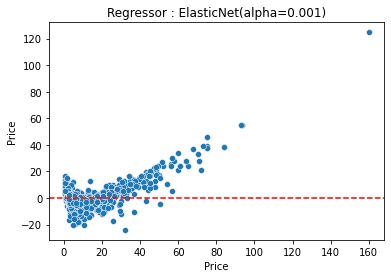

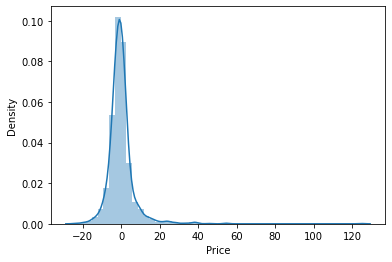

Regression: Lasso(alpha=10) 

Score: 58.09 %
Standard deviation: 0.05
R2 score from Predict: 0.6 




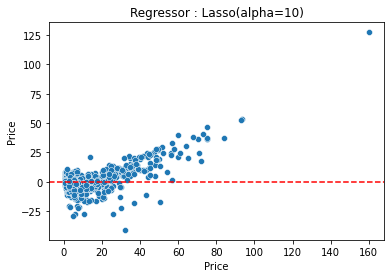

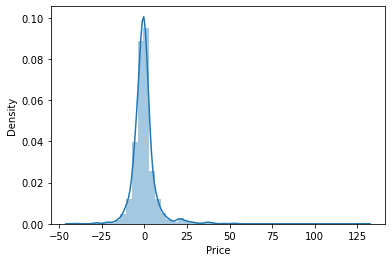

Regression: Ridge(alpha=1) 

Score: 67.12 %
Standard deviation: 0.04
R2 score from Predict: 0.65 




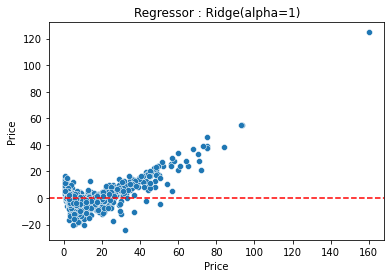

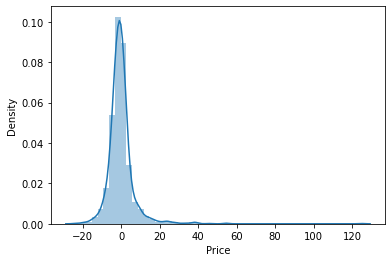

Regression: SGDRegressor() 

Score: -12656114846789393781602012093294313472.00 %
Standard deviation: 232172318178209727909205886430609408.00
R2 score from Predict: -1.8922334094868769e+34 




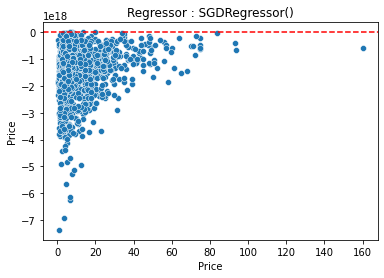

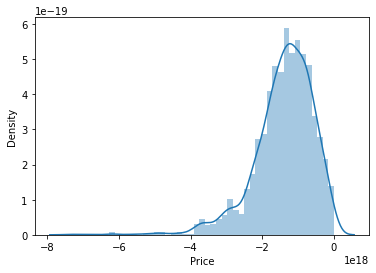

Regression: RandomForestRegressor() 

Score: 87.19 %
Standard deviation: 0.05
R2 score from Predict: 0.86 




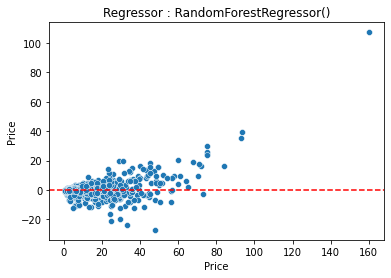

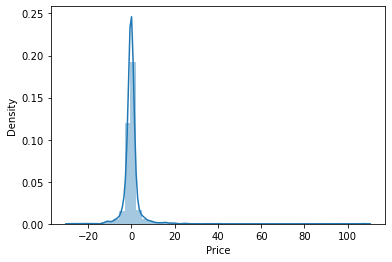

Regression: AdaBoostRegressor() 

Score: 34.94 %
Standard deviation: 0.17
R2 score from Predict: 0.43 




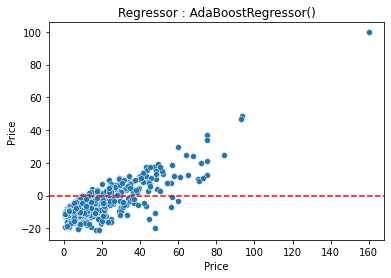

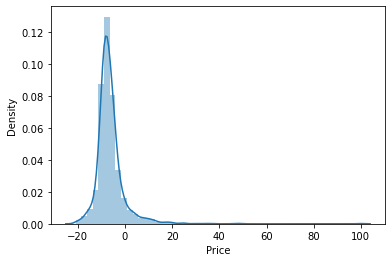

Regression: LinearRegression() 

Score: 67.12 %
Standard deviation: 0.04
R2 score from Predict: 0.65 




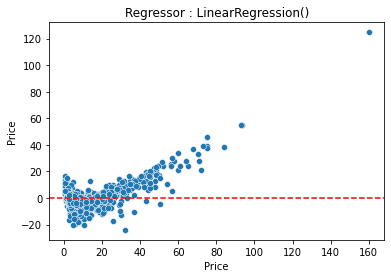

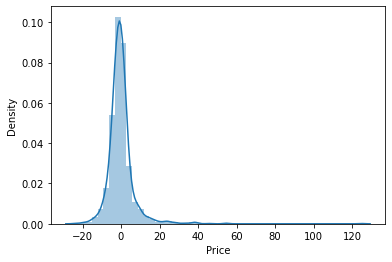

In [57]:
model = [ElasticNet(alpha=0.001),Lasso(alpha=10),Ridge(alpha=1), SGDRegressor(), RandomForestRegressor(), AdaBoostRegressor(), LinearRegression()]
for i in model:
    get_valdiation(i)

Best Model - Random Forest

In [58]:
Model_RandomForest = RandomForestRegressor(max_features='sqrt', bootstrap=True)
Model_RandomForest.fit(X_train, y_train)
Model_RandomForest.score(X_test, y_test)

0.8640691510881463

In [59]:
import pickle
filename = 'predict_model.pkl'
pickle.dump(Model_RandomForest, open(filename, 'wb'))

In [60]:
pwd

'C:\\Users\\Admin\\Documents\\IBM\\Project Development Phase\\Sprint3'